Chicago 311 Service Request Analysis - Tree Trimming

We looked at response times for different service requests by Ward, to see if different alderman have been more or less effective at resolving service requests for their constituents. Chicago overhauled their 311 system in January 2019 and a more comprehensive set of data will be available going forward across all 90+ types of service requests received through the system. Prior to 2019, the city made data available on 12 of the more frequent service requests, and each member of our team examined data for a different request. Data available prior to 2011 was spotty, so we included requests made from 2011 to 2018 in our study. We also filtered out any requests that were still open. 

Observations from the tree trimming requests data set:
1) The total number of completed tree trimming requests over this period was 273,039. Exploring the data, I noticed that a large number of requests (more than a third) were closed on the same day. Anecdotally, I know that routine tree trimming requests take a long time to close, so this large number of requests closed on the same day were likely representing something else -- such as responding to emergencies, construction, demolition, etc. As a result, I decided to only look at tree trim requests that take more than a day to close. (There were similar trends by ward among same day requests and those that took longer than a day, but the same day outliers -- wards 8, 19, 34, and 41 -- were not as extreme excluding the same day data.)

2) Excluding requests closed on the same day, the total number of tree trimming requests completed over the period was 174,982. Wards with the most requests incuded 8 (South side - East Chatham, Avalon Park, Stony Island Park, Burnside, Cottage Grove Heights), 19 (SW side  - Beverly, Mt Greenwood), 34 (South side - adjacent to 19th, Pullman, Washington Heights, Morgan Park), 38 (NW side - Dunning, Portage Park), 41 (NW side - O'Hare, Norwood Park), and 45 (NW side - Jefferson Park). The 42nd ward has the lowest number of requests by far, which isn't surprising since there aren't many trees in the loop. Some lakefront wards -- 46 (N - Uptown), 4 (S - Oakland, Kenwood), and 5 (S - Hyde Park, South Shore) -- also had relatively few requests. 

3) The average time it took to close tree trimming requests citywide (excluding requests closed on the same day) was 239 days. Those closed the quickest (< 150 days, on average) included 42 (the loop), 2 (near north side, Ukrainian Village, Wicker Park, Lincoln Park), 3 (South Loop, Chinatown), 12 (McKinley Park, Brighton Park), and 25 (Bridgeport). The 44th ward (Lakeview, Boystown, Wrigleyville) took the longest to close requests at around 320 days (Tom Tunney, alderman). Other wards with high response times include 33 (Avondale, Ravenswood Manor), 36 (Montclare, Portage Park, Belmont Cragin), 47 (North Center, Ravenswood), and 50 (West Ridge). 

4) We took a look at average household incomes by ward (source: WTTW using DataMade: https://github.com/datamade/ward-demographics#methodology, which used U.S. Census American Community Survey 5-year data) to see if there was a relationship between ward income levels and service request response times. For tree trimming, there doesn't appear to be a clear link between income and response times, as shown in the scatterplot. Two of Chicago's wealthier wards (42 and 2) have some of the fastest response times, but so do a few of its lower income wards (3, 24, 12). At the same time, some of the cities wealthiest wards have the longest response times (44 and 47 take the longest, 32 ranks as the 8th slowest). Of the wards with the 10 slowest response times, eight of them have average income levels at or above the citywide median. Looking at the scatterplot, there also doesn't appear to be an obvious relationship between the number of requests in a ward and the amount of time it takes to close them. 

5) For further study, it may be interesting to check the voting record of the alderman to see how supportive they are of mayoral initiatives, and whether that leaves to better or worse service response times. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
tree_trims_file = "Resources/311_tree_trims.csv"
ward_data_file = "Resources/ward_data.csv"

# Read data
tree_trims_df = pd.read_csv(tree_trims_file)
ward_data_df = pd.read_csv(ward_data_file)

# Display tree trimming data
tree_trims_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Location of Trees,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,06/15/2010,Completed,10/21/2011,10-00862558,Tree Trim,NaN,7237 S AVERS AVE,60629.0,1.151954e+06,1.856340e+06,13.0,8.0,65.0,41.761663,-87.718641,"(41.761662537751896, -87.71864092116586)"
1,06/15/2010,Completed,10/24/2012,10-00861435,Tree Trim,Parkway,7827 S TRUMBULL AVE,60652.0,1.154740e+06,1.852493e+06,18.0,8.0,70.0,41.751052,-87.708530,"(41.75105196947029, -87.70852966806123)"
2,06/15/2010,Completed,10/25/2011,10-00853312,Tree Trim,Parkway,1821 W EDDY ST,60657.0,1.163495e+06,1.923598e+06,47.0,19.0,5.0,41.945992,-87.674449,"(41.94599213964815, -87.67444914936094)"
3,06/15/2010,Completed,10/26/2011,10-00856362,Tree Trim,Parkway,10053 S EBERHART AVE,60628.0,1.181350e+06,1.838414e+06,9.0,5.0,49.0,41.711844,-87.611452,"(41.711844378036105, -87.61145178817645)"
4,06/15/2010,Completed,10/26/2011,10-00858764,Tree Trim,Parkway,5234 W PENSACOLA AVE,60641.0,1.140677e+06,1.928422e+06,38.0,16.0,15.0,41.959679,-87.758203,"(41.95967881175858, -87.75820260590397)"


In [2]:
# Display ward data
ward_data_df.head()

,Ward,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,1,Moreno,55705,108482,0.547,0.050,0.040,0.337
1,2,Hopkins,55855,130287,0.731,0.076,0.070,0.099
2,3,Dowell,51207,33968,0.212,0.616,0.104,0.045
3,4,King,53079,93453,0.221,0.610,0.096,0.044
4,5,Hairston,45853,65738,0.225,0.640,0.067,0.040


In [3]:
# Convert dates to datetime
tree_trims_df['Creation Date'] = pd.to_datetime(tree_trims_df['Creation Date'])
tree_trims_df['Completion Date'] = pd.to_datetime(tree_trims_df['Completion Date'])

tree_trims_df.dtypes

Creation Date              datetime64[ns]
Status                             object
Completion Date            datetime64[ns]
Service Request Number             object
Type of Service Request            object
Location of Trees                  object
Street Address                     object
ZIP Code                          float64
X Coordinate                      float64
Y Coordinate                      float64
Ward                              float64
Police District                   float64
Community Area                    float64
Latitude                          float64
Longitude                         float64
Location                           object
dtype: object

In [4]:
# Create a dataframe from select columns
tree_clean = tree_trims_df[["Service Request Number", "Creation Date", "Completion Date", "Status", "Type of Service Request", "ZIP Code", "Ward", "Latitude", "Longitude"]]

# Remove NA rows in Ward
tree_clean.dropna(subset = ["Ward"], inplace=True)

# Remove "0" ward rows
tree_clean = tree_clean[tree_clean["Ward"] > 0]

# Filter out requests created before 1/1/2011
tree_clean = tree_clean[tree_clean["Creation Date"] >= "2011-01-01"]
tree_clean.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Service Request Number,Creation Date,Completion Date,Status,Type of Service Request,ZIP Code,Ward,Latitude,Longitude
51,11-02942549,2011-06-15,2012-01-05,Completed,Tree Trim,60623.0,22.0,41.837881,-87.732886
52,11-02958838,2011-06-15,2012-01-09,Completed,Tree Trim,60630.0,45.0,41.966854,-87.768586
53,11-02958852,2011-06-15,2012-01-09,Completed,Tree Trim,60630.0,45.0,41.966868,-87.767449
54,11-02946206,2011-06-15,2013-01-09,Completed,Tree Trim,60659.0,50.0,41.992776,-87.715279
55,11-02951380,2011-06-15,2013-01-09,Completed,Tree Trim,60620.0,21.0,41.747282,-87.625737


In [5]:
# Filter out open service requests
tree_completed = tree_clean[tree_clean["Status"] =="Completed"]

In [6]:
# Format ward column
# tree_completed["Ward"] = tree_completed["Ward"].map('{:.0f}'.format)
# tree_completed["ZIP Code"] = tree_completed["ZIP Code"].map('{:.0f}'.format)

tree_completed["Ward"] = tree_completed["Ward"].astype('int64')
# tree_completed["ZIP Code"] = tree_completed["ZIP Code"].astype('int64') # won't work because of NA values

tree_completed.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Service Request Number,Creation Date,Completion Date,Status,Type of Service Request,ZIP Code,Ward,Latitude,Longitude
51,11-02942549,2011-06-15,2012-01-05,Completed,Tree Trim,60623.0,22,41.837881,-87.732886
52,11-02958838,2011-06-15,2012-01-09,Completed,Tree Trim,60630.0,45,41.966854,-87.768586
53,11-02958852,2011-06-15,2012-01-09,Completed,Tree Trim,60630.0,45,41.966868,-87.767449
54,11-02946206,2011-06-15,2013-01-09,Completed,Tree Trim,60659.0,50,41.992776,-87.715279
55,11-02951380,2011-06-15,2013-01-09,Completed,Tree Trim,60620.0,21,41.747282,-87.625737


In [7]:
# Add a column calculating Days to Complete
tree_completed['Days to Complete'] = (tree_completed['Completion Date'] - tree_completed['Creation Date']).dt.days

# View dataframe
tree_completed.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Service Request Number,Creation Date,Completion Date,Status,Type of Service Request,ZIP Code,Ward,Latitude,Longitude,Days to Complete
51,11-02942549,2011-06-15,2012-01-05,Completed,Tree Trim,60623.0,22,41.837881,-87.732886,204
52,11-02958838,2011-06-15,2012-01-09,Completed,Tree Trim,60630.0,45,41.966854,-87.768586,208
53,11-02958852,2011-06-15,2012-01-09,Completed,Tree Trim,60630.0,45,41.966868,-87.767449,208
54,11-02946206,2011-06-15,2013-01-09,Completed,Tree Trim,60659.0,50,41.992776,-87.715279,574
55,11-02951380,2011-06-15,2013-01-09,Completed,Tree Trim,60620.0,21,41.747282,-87.625737,574


In [8]:
# Explore days to complete data
tree_completed["Days to Complete"].describe()

count    273039.000000
mean        153.145562
std         229.671409
min           0.000000
25%           0.000000
50%          64.000000
75%         196.000000
max        1897.000000
Name: Days to Complete, dtype: float64

In [9]:
# A large number of requests were completed on the same day. Explore. 
zero_days = tree_completed[tree_completed["Days to Complete"] == 0]
zero_percent_total = round(zero_days["Days to Complete"].count() / tree_completed["Days to Complete"].count() * 100, 1)
total_completed_requests = tree_completed["Days to Complete"].count()
beg_date = tree_completed["Creation Date"].min()
end_date = tree_completed["Creation Date"].max()

print(f'Between {beg_date} and {end_date}:')
print(f'Total number of completed tree trim requests: {total_completed_requests}.')
print(f'Number of tree trim requests completed on the same day: {zero_days["Days to Complete"].count()}')
print(f'Percent of tree trim requests completed on the same day: {zero_percent_total}%')


Between 2011-01-01 00:00:00 and 2018-12-17 00:00:00:
Total number of completed tree trim requests: 273039.
Number of tree trim requests completed on the same day: 98057
Percent of tree trim requests completed on the same day: 35.9%


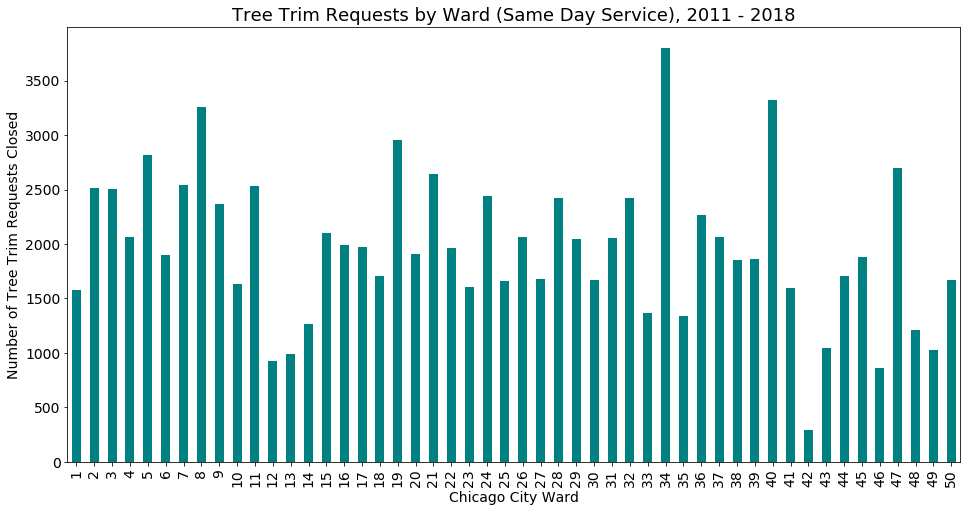

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot a bar chart for number of requests closed in zero days by ward
# Group by ward
zero_group = zero_days.groupby("Ward")

# Count the number of requests by ward
ward_zero_counts = zero_group["Ward"].count()

# Plot in a bar chart
ward_zero_chart = ward_zero_counts.plot(kind='bar', facecolor='teal', figsize = (16,8), fontsize=14)

# Set the xlabel and ylabel using class methods
ward_zero_chart.set_title("Tree Trim Requests by Ward (Same Day Service), 2011 - 2018", fontsize=18)
ward_zero_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_zero_chart.set_ylabel("Number of Tree Trim Requests Closed", fontsize=14)

plt.show()
plt.tight_layout()

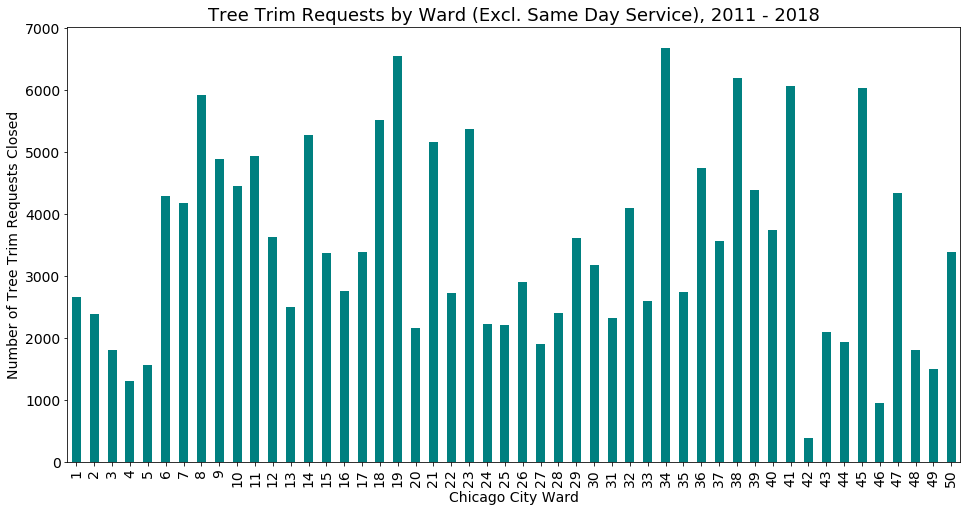

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot a bar chart for number of requests that weren't closed on the same day by ward
# Filter out requests that were closed on the same day
nonzero_days = tree_completed[tree_completed["Days to Complete"] > 0]

# Group by ward
nonzero_group = nonzero_days.groupby("Ward")

# Count the number of requests by ward
ward_nonzero_counts = nonzero_group["Ward"].count()

# Plot in a bar chart
ward_nonzero_chart = ward_nonzero_counts.plot(kind='bar', facecolor='teal', figsize = (16,8), fontsize=14)

# Set the xlabel and ylabel using class methods
ward_nonzero_chart.set_title("Tree Trim Requests by Ward (Excl. Same Day Service), 2011 - 2018", fontsize=18)
ward_nonzero_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_nonzero_chart.set_ylabel("Number of Tree Trim Requests Closed", fontsize=14)

# Save figure
plt.savefig("Charts/trees_requests.png")

# Show the plot
plt.show()
plt.tight_layout()

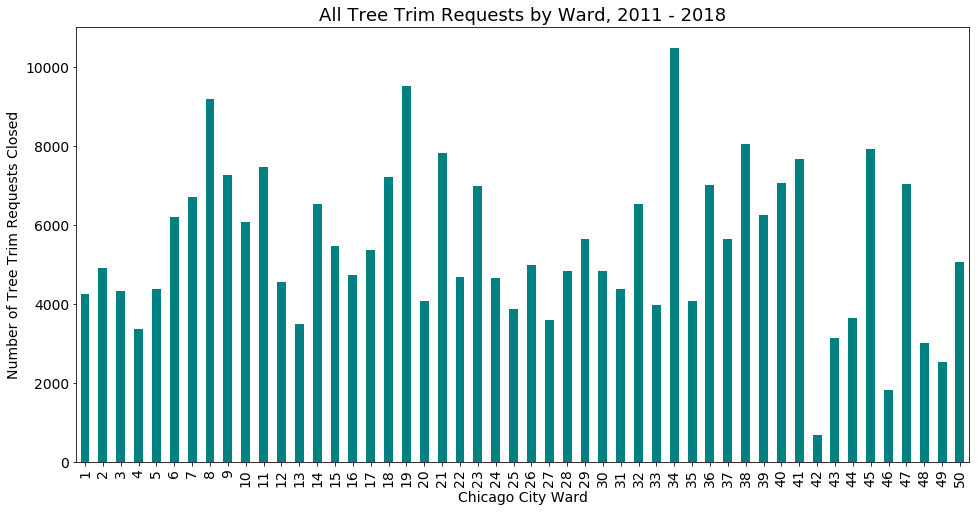

<Figure size 432x288 with 0 Axes>

In [12]:
# Plot total number of requests by ward
# Group by ward
completed_group = tree_completed.groupby("Ward")

# Count the number of requests by ward
ward_counts = completed_group["Ward"].count()

# Plot in a bar chart
ward_chart = ward_counts.plot(kind='bar', facecolor='teal', figsize = (16,8), fontsize=14)

# Set the xlabel and ylabel using class methods
ward_chart.set_title("All Tree Trim Requests by Ward, 2011 - 2018", fontsize=18)
ward_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_chart.set_ylabel("Number of Tree Trim Requests Closed", fontsize=14)

plt.show()
plt.tight_layout()

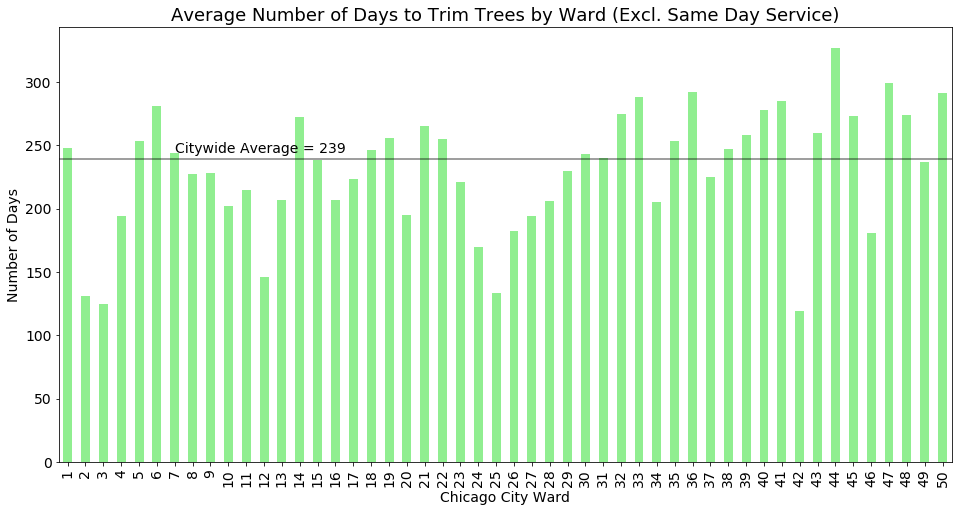

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot the average time to close a request by ward using nonzero group

# Calculate the average time it took to close requests across wards
avg_days_city = round(nonzero_days["Days to Complete"].mean())

# Calculate the average time it took to close requests by ward
avg_days_ward = round(nonzero_group["Days to Complete"].mean())

# Plot in a bar chart
avg_days_chart = avg_days_ward.plot(kind='bar', facecolor='lightgreen', figsize = (16,8), fontsize=14)

# Labels and other formatting
avg_days_chart.set_title("Average Number of Days to Trim Trees by Ward (Excl. Same Day Service)", fontsize=18)
avg_days_chart.set_xlabel("Chicago City Ward", fontsize=14)
avg_days_chart.set_ylabel("Number of Days", fontsize=14)
plt.axhline(avg_days_city, color = 'black', alpha = 0.5, label = 'Citywide Average')
plt.text(6,(avg_days_city + 5), f'Citywide Average = {avg_days_city}', fontsize=14)

# Save figure
plt.savefig("Charts/trees_avg_days.png")

# Show the plot
plt.show()
plt.tight_layout()

In [14]:
# Create a data frame from nonzero ward group
ward_summary = pd.DataFrame({"Number of Service Requests": ward_nonzero_counts,
                                    "Average Days to Complete": avg_days_ward})
ward_summary.head()

,Number of Service Requests,Average Days to Complete
Ward,,
1,2668,248.0
2,2393,131.0
3,1811,125.0
4,1301,194.0
5,1572,253.0


In [15]:
# Merge ward summary table with ward data
ward_merge = pd.merge(ward_summary, ward_data_df, on="Ward")
ward_merge_sorted = ward_merge.sort_values("Average Days to Complete", ascending=False)
ward_merge_sorted.reset_index(drop=True)

,Ward,Number of Service Requests,Average Days to Complete,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,44,1933,327.0,Tunney,58580,121687,0.806,0.031,0.069,0.067
1,47,4349,299.0,Pawar,61367,130370,0.761,0.024,0.058,0.120
2,36,4752,292.0,Villegas,51771,66687,0.225,0.030,0.036,0.700
3,50,3388,291.0,Silverstein,59669,72854,0.449,0.122,0.220,0.167
4,33,2606,288.0,Mell,56914,77773,0.361,0.041,0.093,0.476
5,41,6078,285.0,Napolitano,58195,68887,0.892,0.010,0.042,0.121
6,6,4296,281.0,Sawyer,48598,43443,0.010,0.959,0.001,0.019
7,40,3738,278.0,O'Connor,57582,82464,0.508,0.065,0.163,0.222
8,32,4103,275.0,Waguespack,58091,162593,0.723,0.026,0.048,0.172
9,48,1808,274.0,Osterman,49517,73574,0.538,0.149,0.125,0.156


72.6


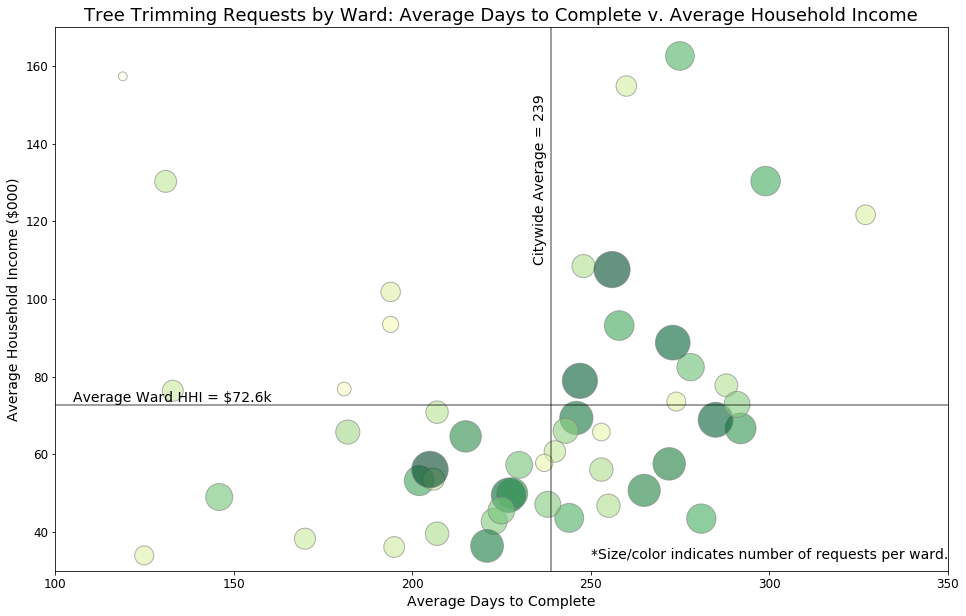

<Figure size 432x288 with 0 Axes>

In [27]:
# Create a scatterplot showing average days to complete v. average household income
x_axis = ward_merge["Average Days to Complete"]
y_axis = ward_merge["Mean Household Income"] / 1000
size = ward_merge["Number of Service Requests"] / 5
color = ward_merge["Number of Service Requests"]

# Calculate the average of mean household income by ward
city_income_mean = round(ward_merge["Mean Household Income"].mean() / 1000, 1)
print(city_income_mean)

# plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_axis, s=size, marker="o", c=color, cmap="YlGn", edgecolors="grey", alpha=0.6)

# Format chart
plt.title("Tree Trimming Requests by Ward: Average Days to Complete v. Average Household Income", fontsize=18)
plt.xlabel("Average Days to Complete", fontsize=14)
plt.ylabel("Average Household Income ($000)", fontsize=14)
plt.axvline(avg_days_city, color = 'black', alpha = 0.5)
plt.axhline(city_income_mean, color = 'black', alpha = 0.5)
plt.text((avg_days_city - 5), 150, f'Citywide Average = {avg_days_city}', rotation=90, fontsize=14)
plt.text(105, (city_income_mean + 1), f'Average Ward HHI = ${city_income_mean}k', fontsize=14)
plt.text(250, 33, "*Size/color indicates number of requests per ward.", fontsize=14)
plt.xlim([100, 350])
plt.ylim([30, 170])
plt.gcf().set_size_inches((16, 10))
plt.tick_params(axis='both', which='major', labelsize=12)

# Save figure
plt.savefig("Charts/trees_income.png")

# Show the plot
plt.show()
plt.tight_layout()